In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv("twitter_sentiment.csv",header = None,index_col=0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df = df[[2,3]].reset_index(drop= True)

In [4]:
df.head()

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.columns = ['Sentiment',"text"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

Sentiment      0
text         686
dtype: int64

In [10]:
# df.dropna(inplace = True)
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(72883, 2)
(72883, 2)


In [11]:
df['Sentiment'].value_counts()

Sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [12]:
df.head(2)

,Sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...


In [13]:
df["word_count"] = df.text.apply(lambda x: len(x.split()))
df["char_count"] = df.text.apply(lambda x: len(x))
df["avg_word_length"] = df.text.apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) )

In [14]:
import nltk
from nltk.corpus import stopwords

sw = stopwords.words('english')

df['stopword_count'] = df.text.apply(lambda x: len([word for word in x.split() if word.lower() in sw]))



In [15]:

df.text.apply(lambda x: len(x.split()))

0        11
1        12
2        10
3        10
4        12
         ..
75677    47
75678    46
75679    24
75680     8
75681    16
Name: text, Length: 72883, dtype: int64

In [16]:
df.text.apply(lambda x: sum(len(word) for word in x.split()))

0         43
1         40
2         41
3         42
4         46
        ... 
75677    235
75678    202
75679     97
75680     42
75681    101
Name: text, Length: 72883, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

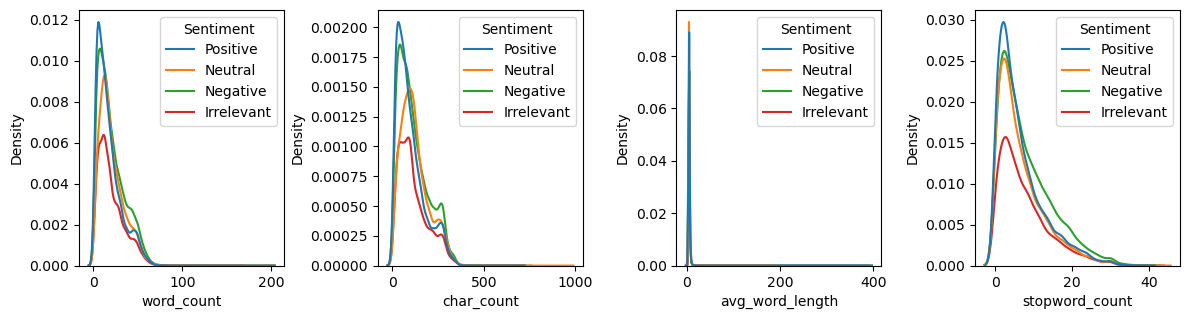

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,6))

num_cols = df.select_dtypes(include = 'number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data = df,x = col, hue = 'Sentiment',fill = False)

plt.tight_layout()
plt.show

In [18]:
df.select_dtypes(include = 'number')

,word_count,char_count,avg_word_length,stopword_count
0,11,53,3.909091,6
1,12,51,3.333333,8
2,10,50,4.100000,5
3,10,51,4.200000,5
4,12,57,3.833333,6
...,...,...,...,...
75677,47,281,5.000000,20
75678,46,248,4.391304,19
75679,24,120,4.041667,10
75680,8,49,5.250000,2


<Axes: ylabel='count'>

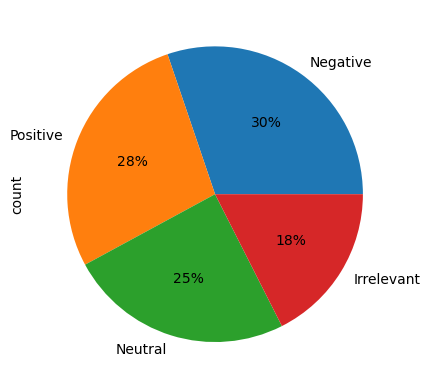

In [19]:
df.Sentiment.value_counts().plot(kind = 'pie',autopct = '%1.0f%%')

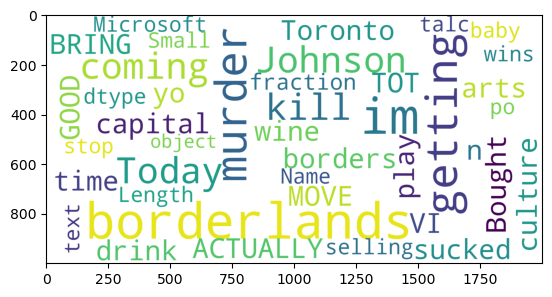

In [20]:
## Word Cloud visualization
 
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='white',stopwords=sw,max_words=300,
                      max_font_size=40,scale=5).generate(str(df['text']))


plt.imshow(wordcloud)

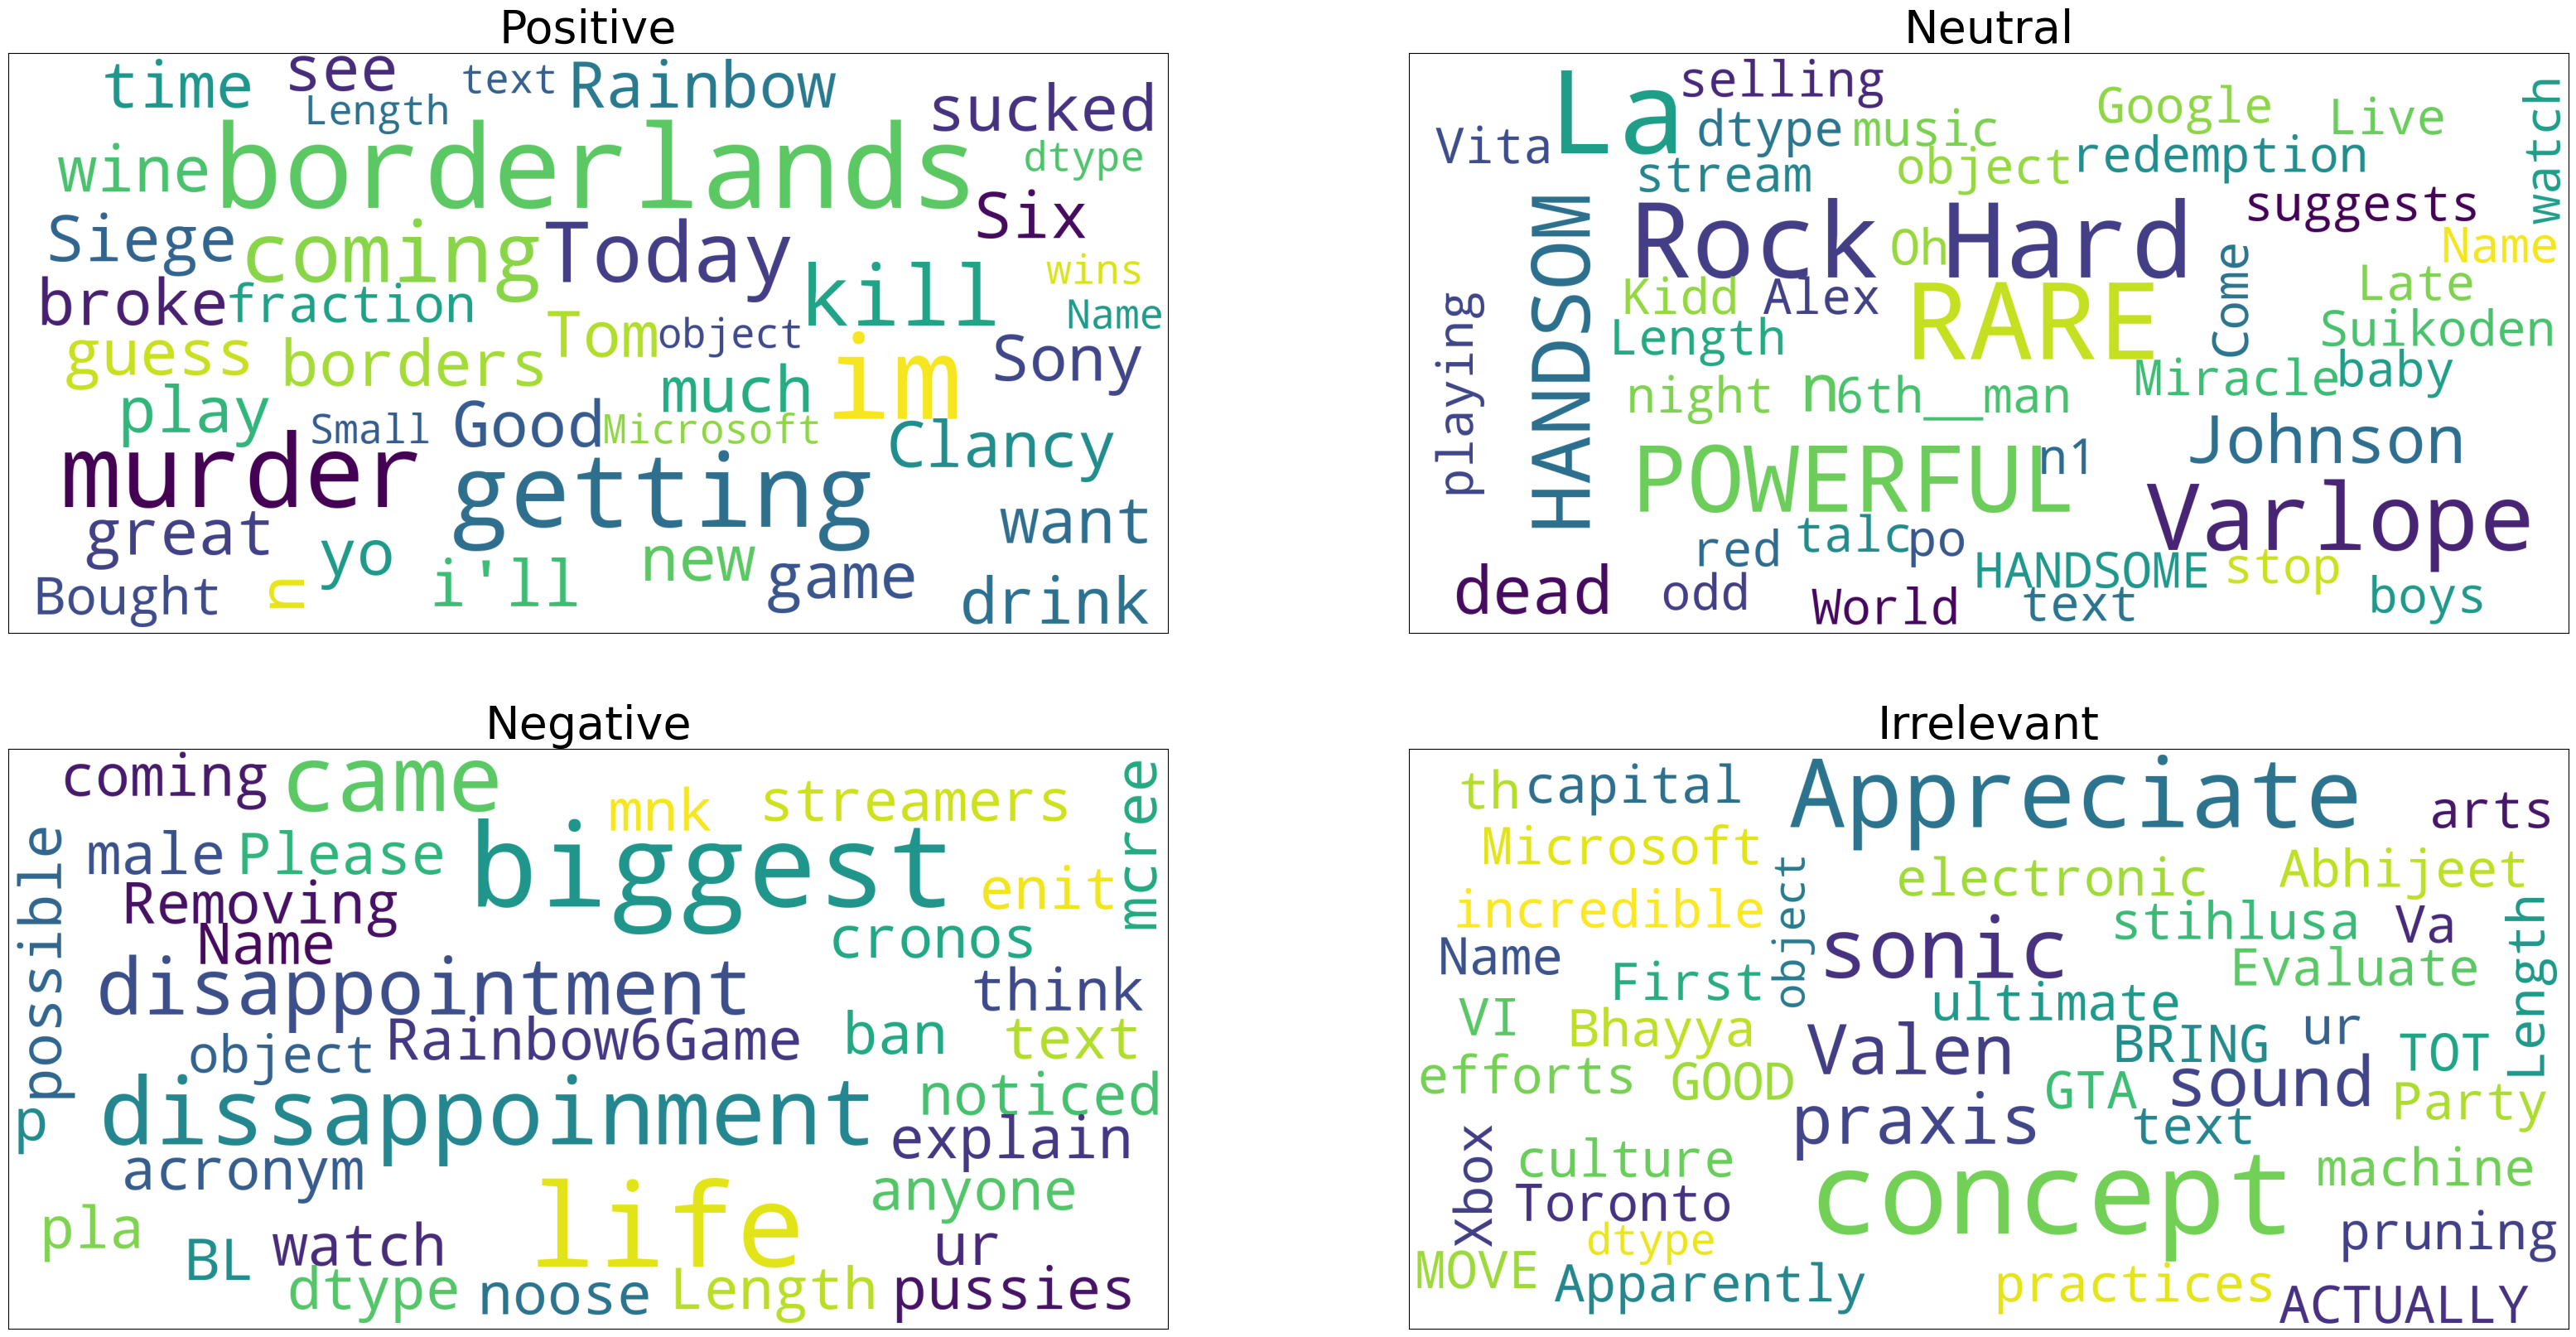

In [21]:
plt.figure(figsize=(40,20))

for index, sentiments in enumerate(df['Sentiment'].unique()):
    plt.subplot(2,2,index+1)
    df1 = df[df["Sentiment"] == sentiments]['text']
    
    wordcloud = WordCloud(background_color='white',stopwords=sw,max_words=300,
                          max_font_size=40,scale=5).generate(str(df1))

    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sentiments,fontsize = 40)

 ## Data cleaning

In [34]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Define stopwords
stop = set(stopwords.words('english'))

# Define function to remove links
def remove_links(text):
    return re.sub(r"(https?://\S+)", " ", text)

# Define function to remove punctuation
def remove_punctuation(text):
    return re.sub(r"[.,!?:;\-='\"@#_]", " ", text)

# Define function to remove numbers
def remove_numbers(text):
    return re.sub(r"\d+", "", text)

# Define function to remove emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

# Define function to remove stopwords
def remove_stopwords(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text

# Define tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Apply preprocessing steps
df["text"] = df["text"].apply(remove_links)
df["text"] = df["text"].apply(remove_punctuation)
df["text"] = df["text"].apply(remove_numbers)
df["text"] = df["text"].apply(deEmojify)
df["text"] = df["text"].apply(remove_stopwords)
df["text"] = df["text"].apply(lambda x: tokenizer.tokenize(x))


In [35]:
df.head()

,Sentiment,text,word_count,char_count,avg_word_length,stopword_count
0,Positive,"[im, getting, borderlands, murder]",11,53,3.909091,6
1,Positive,"[coming, borders, kill]",12,51,3.333333,8
2,Positive,"[im, getting, borderlands, kill]",10,50,4.100000,5
3,Positive,"[im, coming, borderlands, murder]",10,51,4.200000,5
4,Positive,"[im, getting, borderlands, murder]",12,57,3.833333,6


In [37]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['text'],df['Sentiment'],
                            
                                                 test_size=0.2,random_state=0)

In [38]:
X_train.shape,X_test.shape,y_train.shape

((58306,), (14577,), (58306,))

### Model Building and Testing

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [40]:
clf = Pipeline([('tfid',TfidfVectorizer()),
                ('rfc',RandomForestClassifier(n_jobs = -1))])

In [41]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [44]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.87      0.91      2561
    Negative       0.92      0.95      0.94      4481
     Neutral       0.94      0.93      0.93      3553
    Positive       0.90      0.94      0.92      3982

    accuracy                           0.93     14577
   macro avg       0.93      0.92      0.93     14577
weighted avg       0.93      0.93      0.93     14577



In [45]:
import pickle
pickle.dump(clf,open('twitter_sentiment.pkl','wb'))

In [46]:
clf.predict(['are you bad here '])

array(['Negative'], dtype=object)

In [49]:
clf.predict(['but i am really not happy at all'])

array(['Positive'], dtype=object)

In [ ]:
clf.predict(['w'])